# Jay Bhanushali - 60009200047
---
# Lab 3 Backpropogation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Iris dataset

In [2]:
from sklearn import datasets 
df=datasets.load_iris()
df['data']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Converting 1d target in to 3d array

In [3]:
y=pd.get_dummies(df.target).values
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

Spliting the dataset into train and test

## Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.data, y, test_size=0.2, random_state=42)

## Functions required in forward/backward propogation

In [5]:
def sigmoid(a):
  return  1/(1 + np.exp(-a))

In [6]:
def error(y_train,y_hat):
  temp=(((y_train-y_hat)**2)/len(y_train))
  # print(temp)
  mse=temp.mean()
  # print(mse)
  return mse

In [7]:
def accu(y_train,y_hat):
  a=[]
  a=y_train.argmax(axis=1)==y_hat.argmax(axis=1)
  # print(a)
  return a.mean()

## Random initialization of parameters

In [8]:
w = np.random.normal(size=(2,3))
v=np.random.normal(size=(4,2))

## Forward propogation function

In [9]:
def forward_pass(X_train,y_train,w,v,accuracy):
  #calculating zin
  zin=np.dot(X_train,v)
  
  #Calculating z
  z = sigmoid(zin)

  yin=np.dot(z,w)

  y_hat=sigmoid(yin)

  mse=error(y_train,y_hat)
  # print(mse)
  accuracy1=accu(y_train,y_hat)
  # print(accuracy)
  accuracy.append(accuracy1)
  return y_hat,z,mse

# forward_pass(X_train,y_train,w,v)



## Backward propogation function

In [10]:
def backpropogation(y_train,y_hat,z,w,v,alpha):
  dy=(y_train-y_hat)*y_hat*(1-y_hat)

  dw=np.dot(z.T,dy)

  dz=np.dot(dy,w.T)*z*(1-z)

  dv=np.dot(X_train.T,dz)

  w=w-alpha*dw
  v-v-alpha*dv
  return w,v


In [11]:
accuracy=[]
msee=[]

def solve(X_train,y_train,w,v):
  alpha=1
  epoch=1000
  '''
  For each iteration:
    do forward pass (which calculates y_hat, z, mse)
    calculate mean square error and store in list
    do forward pass (which updates w, v)

  '''
  for _ in range(epoch):

    y_hat,z,mse=forward_pass(X_train,y_train,w,v,accuracy)
    msee.append(mse)
    w,v=backpropogation(y_train,y_hat,z,w,v,alpha)

solve(X_train,y_train,w,v)
print(accuracy)

# print(sum(accuracy)/len(accuracy))



[0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325

In [12]:
iter=list(range(1000))

Text(0, 0.5, 'Accuracy')

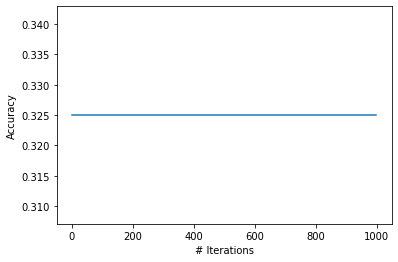

In [13]:
plt.plot(iter,accuracy)
plt.xlabel('# Iterations')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Mean Square Error')

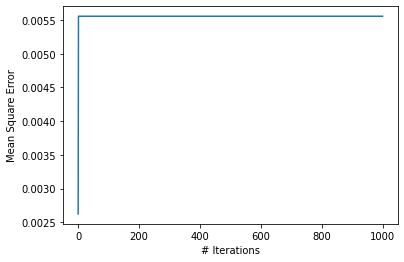

In [14]:
plt.plot(iter,msee)
plt.xlabel('# Iterations')
plt.ylabel('Mean Square Error')